In [1]:
import numpy as np 
from scipy.integrate import odeint, solve_ivp 
import matplotlib.pyplot as plt 

In [69]:
#define the 1-order ODE
def dydt(t, y):
    return 2 - 2*y - np.exp(-4*t)

#def dydt(t, y): 
#    return (3*y**(0.5))+(t**3)

In [87]:
step = .1 #step size
num = 10 #number of data
num = int(num)
t = np.arange(0, np.round(step*num, 2), step) #range of the time
y = np.zeros(num)
y[0]=1 #initial value 

#Euler's method
for i in range(num-1): 
    y[i+1] = y[i] + step*(dydt(t[i], y[i]))

In [88]:
#print the result of Euler's method
print('t \t y')
print('-'*20)
for i in range(len(t)):
    print(np.around(t[i], 2), '\t', y[i])

t 	 y
--------------------
0.0 	 1.0
0.1 	 0.9
0.2 	 0.8529679953964361
0.3 	 0.8374414999054267
0.4 	 0.8398337787331212
0.5 	 0.8516773711870314
0.6 	 0.8678083686259638
0.7 	 0.8851748995718298
0.8 	 0.902058913394942
0.9 	 0.917570910318117


In [89]:
step = .1 #step size
num = 10 #number of data
num = int(num)
t = np.arange(0, np.round(step*num, 2), step) #range of the time
yh = np.zeros(num)
yh[0]=1

#Heun's method 
for i in range(num-1):
    f1 = dydt(t[i], yh[i])
    yh[i+1] = yh[i] + step*(f1)
    f2 = dydt(t[i+1], yh[i+1])
    yh[i+1] = yh[i] + step*((f1+f2)/2)

In [90]:
#print the result of Heun's method
print('t \t y')
print('-'*20)
for i in range(len(t)):
    print(np.around(t[i], 2), '\t', yh[i])

t 	 y
--------------------
0.0 	 1.0
0.1 	 0.926483997698218
0.2 	 0.8904376280652521
0.3 	 0.8771259858532078
0.4 	 0.8771007140234095
0.5 	 0.884379960617579
0.6 	 0.8952422587124796
0.7 	 0.9074294308813959
0.8 	 0.9196216206188177
0.9 	 0.9310930546259313


In [92]:
step = .1 #step size
num = 10 #number of data
num = int(num)
t = np.arange(0, np.round(step*num, 2), step) #range of the time
ym = np.zeros(num)
ym[0] = 1

#midpoint method 
for i in range(num-1):
    f1 = dydt(t[i], y[i])
    ymp = ym[i] + (step/2)*(f1)
    f2 = dydt(t[i]+(step/2), ymp)
    ym[i+1] = ym[i] + step*f2

In [93]:
#print the result of midpoint method
print('t \t y')
print('-'*20)
for i in range(len(t)):
    print(np.around(t[i], 2), '\t', ym[i])

t 	 y
--------------------
0.0 	 1.0
0.1 	 0.9281269246922018
0.2 	 0.8923235766047152
0.3 	 0.8786235667157288
0.4 	 0.8779999290956529
0.5 	 0.8846856952089727
0.6 	 0.8950551405870515
0.7 	 0.9068801015536212
0.8 	 0.9188369730237993
0.9 	 0.9301810517306893


In [141]:
#scipy odeint and solve_ivp
y1 = odeint(dydt, y0=[1], t=t, tfirst=True)
y2 = solve_ivp(dydt, t_span=(min(t), max(t)), y0=[1], t_eval=t, method='RK45')

In [142]:
#analytic solution
ansy=[]
for i in t: 
    ycal = 1 + 0.5*np.exp(-4*i) - 0.5*np.exp(-2*i)
    ansy.append(ycal)
ansy=np.array(ansy)

In [143]:
ansy

array([1.        , 0.92579465, 0.88950446, 0.87619129, 0.87628378,
       0.88372792, 0.89476187, 0.90710655, 0.91943284, 0.93101242])

<IPython.core.display.Javascript object>


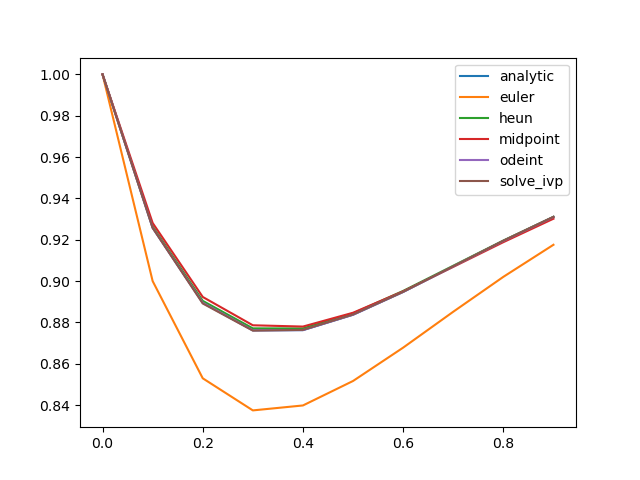

In [144]:
%matplotlib notebook
plt.figure()
plt.plot(t, ansy, label='analytic')
plt.plot(t, y, label='euler')
plt.plot(t, yh, label='heun')
plt.plot(t, ym, label='midpoint')
plt.plot(t, y1.T[0], label='odeint')
plt.plot(t, y2.y[0], label='solve_ivp')
plt.legend(loc='best')
plt.show()

In [145]:
err1 = np.abs((ansy-y)*100)
err2 = np.abs((ansy-yh)*100)
err3 = np.abs((ansy-ym)*100)
err4 = np.abs((ansy-y1.T[0])*100)
err5 = np.abs((ansy-y2.y[0])*100)

print('euler \t \t \t heun \t \t \t midpoint \t \t odeint \t \t \t solve_ivp')
print('-'*127)
for i in range(1, len(t)):
    print(err1[i], '\t', err2[i], '\t', err3[i], '\t', err4[i], '\t', err5[i])

euler 	 	 	 heun 	 	 	 midpoint 	 	 odeint 	 	 	 solve_ivp
-------------------------------------------------------------------------------------------------------------------------------
2.5794646478828898 	 0.06893512193890672 	 0.2332278213372896 	 1.4520542657159297e-06 	 0.005579806077105065
3.6536463644355033 	 0.09331690244609447 	 0.2819117563924056 	 1.826968420992614e-06 	 0.034002467607219256
3.8749788003661134 	 0.09346979441199332 	 0.24322788066409862 	 2.5216974508524004e-06 	 0.015184640239029878
3.644999820559569 	 0.08169370846926594 	 0.17161521569361016 	 3.384722391253092e-07 	 0.012046736955584336
3.205054984555389 	 0.06520395849937133 	 0.0957774176387427 	 1.3073622184833766e-07 	 0.01213190247860707
2.6953502062641466 	 0.04803880238744007 	 0.029326989844624674 	 1.2725593245832556e-06 	 0.005210018378265513
2.193164976997597 	 0.03228815395901474 	 0.022644778818459166 	 1.8392568468250658e-06 	 0.006876561775925882
1.7373929596913307 	 0.018877762696234424 	